# Proyecto Final para el Curso de Data Science I en Coderhouse
## Por Gonzalo Gongora Diego

En esta entrega se cubren las siguentes rubricas:

1. Feature Selection
2. Tratamiento de datos perdidos o incompletos
3. Seleccion de Algoritmo
4. Metricas
5. Conclusiones

El dataset esta compuesto de una carpeta de archivos en formato CSV conteniendo informacion de usuarios que realizan reservaciones en la plataforma AirBnB para diferentes paises. Dicho Dataset puede descargarse de kaggle (unicamente despues de un muy engorroso proceso de alta de usuario) en la siguiente liga:

__https://www.kaggle.com/competitions/airbnb-recruiting-new-user-bookings/data__

El sitio web describe el Dataset con el siguiente parrafo:

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
Dataset Description'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

In this challenge, you are given a list of users along with their demographics, web session records, and some summary statistics. You are asked to predict which country a new user's first booking destination will be. All the users in this dataset are from the USA.

There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

The training and test sets are split by dates. In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted). In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010. 

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

## Descripcion del Dataset

El dataset consta de 5 archivos en formato CSV que contienen unformacion de los usuarios y reservaciones en la plataforma AirBnb. Los archivos son los siguientes:

1. **age_gender_bkts**: contiene info. de la edad, pais, genero, ID y anyo de registro de los usuarios
2. **countries**: describe los paises destino de los diferentes usuarios, describe la ubicacion con latitud y longitud, distancia en km, descripcion del destino en km2, lenguaje del pais destino y distancia levenshtein del lenguaje
3. **sessions**: contiene informacion de sesion del usuario, userID, accion ejecutada, tipo de accion, detalle de accion, tipo de dispositivo y segundos transcurridos
4. **test_users**: dataset de 15 columnas con informacion de los regtistros como user ID, fecha de creacion del usuario, timestamp de actividad, fecha de la primera reserva, genero, edad, metodo de registro, flujo de registro, idioma, canal afiliado, proveedor afiliado, primer afiliado reconocido, tipo de aplicacion de registro y primer browser. Se usa para probar el modelo predictivo.
5. **train_users_2**: dataset de 16 columnas con informacion de los regtistros como user ID, fecha de creacion del usuario, timestamp de actividad, fecha de la primera reserva, genero, edad, metodo de registro, flujo de registro, idioma, canal afiliado, proveedor afiliado, primer afiliado reconocido, tipo de aplicacion de registro, primer browser y pais de destino. 

El objetivo de todo el dataset es que el programador se dedique a disenyar y entrenar un modelo predictivo para lograr saber cual es el siguiente pais que visitara un usuario registrado.



## Librerias Necesarias
Este proyecto empieza importando las librerias necesarias. Necesito bastantes librerias para llenar, organizar, procesar, y revisar estructuras de datos o Dataframes, necesito librerias para las graficas que uso durante el Analisis Exploratorio de Datos y tambien necesito librerias para el modelado de predicciones usando Machine Learning:

Procesamiento de Dataframes:

    1. Pandas
    2. NumPy
    3. datetime  

Generacion de Graficas:

    4. Matplotlib

Modelado de Machine Learning:

    5. sklearn LabelEncoder
    6. sklearn train_test_slpit
    7. sklearn RandomForestClassifier
    8. sklearn cross_val_score
    9. sklearn classification_report
    10. sklearn confusion_matrix,mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from xgboost import XGBClassifier  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, accuracy_score

print("Importacion de librerias exitosa")

Importacion de librerias exitosa


## Observando el Dataset ...
Empezamos el analisis cargando y describiendo el dataset, me importa saber:
- Cuantas filas y cuantas columnas tiene
- Si tiene informacion faltante 
- Como se ve un valor incorrectamente registrado

In [2]:
#Voy importar el csv como un dataframe de pandas e imprimir las columnas que tiene

df = pd.read_csv("train_users_2.csv")
df.head()
#df.tail()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
df.shape

(213451, 16)

El csv 'train_users_2' esta compuesto de 213,451 filas con 16 columnas, mas que suficiente para poder trabajar diferentes indicadores.

Sin embargo, podemos observar que el dataset se cargo correctamente y desde el vamos, las columnas 'date_first_booking', y 'age' contienen datos NaN. Tengo que indagar mas en las columnas para determinar cuales son los datos que pueden sesgar mis predicciones, para esto empiezo el EDA.


## Analisis Exploratorio de Datos (EDA)
El objetivo de este EDA es lidiar con los datos faltantes y/o erroneos dentro del Dataset. Este Dataset viene bastante sucio, pues el objetivo de subirlo a Kaggle es un desafio pensado para cientificos de datos.

Empezare listando los datos que estan mal:
- Los datos -Unknown- en la columna ['gender'], se encuentran algunos como "-unknown-"
- La columna ['age'] es todo un fenomeno, pues tenemos usuarios de 2000, 0, 1500 y 3 anyos, asi como valores NaN
- En la columna ['first_affiliate_tracked'] muchos datos son "untracked"
- En la columna ['country_destination'] muchos de los datos son NDF, que significa: No Destination Found, asi como tambien tiene valores 'other'
Empezare por sacar los valores unicos de cada columna para buscar valores fuera de lugar.

### Variable Pais Destino

<Axes: xlabel='country_destination'>

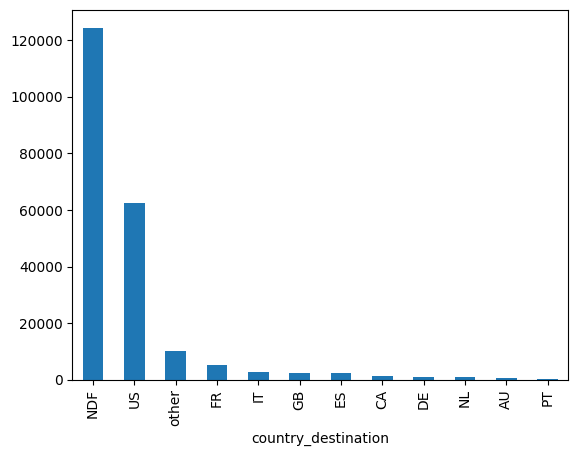

In [4]:
#Primero grafico los Paises Destino que son la variable Target segun el Desafio en Kaggle:
df.country_destination.unique()
df['country_destination'].value_counts().plot.bar()

Como mencionan en la descripcion del Dataset, NDF es un pais no definido. Este dato podria indicar que el usuario nunca realizo reserva. Este dato es muy distinto al caso de 'other' que podria indicar que el usuario realizo alguna reserva pero NO corresponde a ninguno de los paises enlistados, pues la seleccion es limitada. Decidire no eliminar ningun dato de esta columna.

### Variable Edad

El analisis superficial del dataset muestra casi inmediatamente que la columna de Edad ['age'] contiene valores problematicos. Un escaneo rapido de los datos confirma que esta columna sera problematica:

<Axes: xlabel='age'>

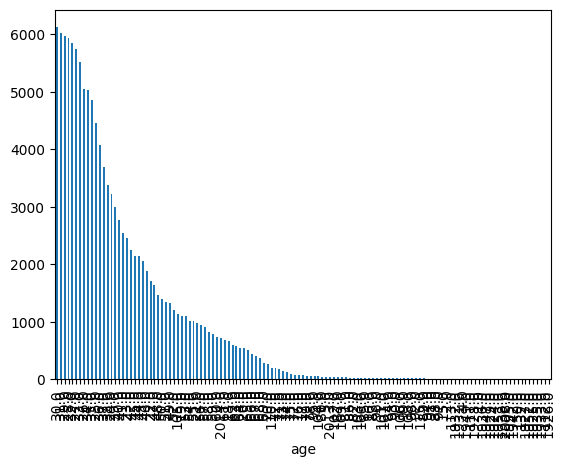

In [5]:
#Segundo, procedo a graficar el conteo de las edades, que tienen valores atipicos:
df['age'].value_counts().plot.bar()

Graficar los valores unicos de las edades fue una pesima idea, pues tenemos valores UNICOS desde 0 hasta 1920. Puedo escribir un codigo para hallar edades entre 18 y 110 anyos, un intervalo razonable dada la expectativa de vida de un ser humano promedio y tambien, que coincide con los terminos y condiciones para el uso responsable de la plataforma AirBnB.



<Axes: xlabel='age'>

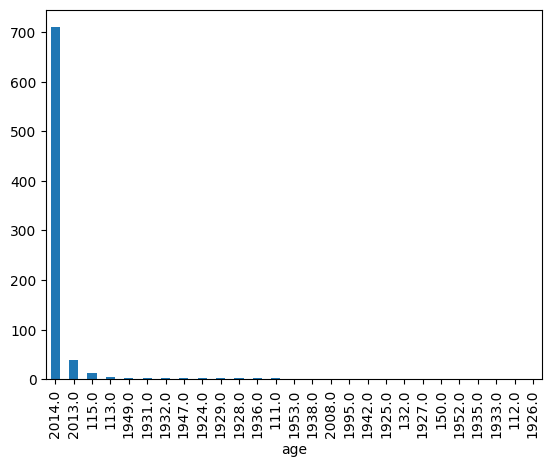

In [6]:
#Hallar valores de Edad mayores a 110 anyos y graficar

df.loc[df.age > 110, 'age'].value_counts().plot.bar()


<Axes: xlabel='age'>

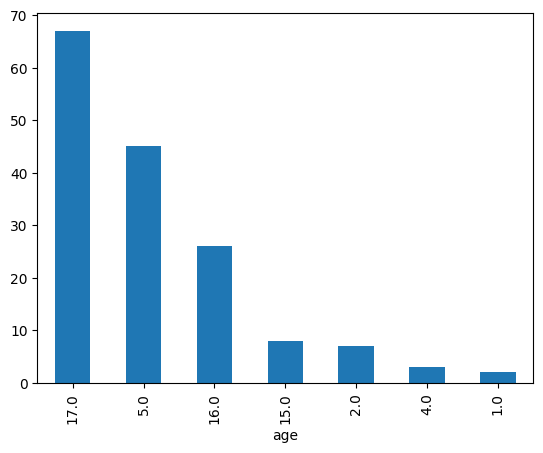

In [7]:
#Hallar valores de Edad menores a 18 anyos (no pueden usar AirBnB con esta condicion) y graficar
df.loc[df.age < 18, 'age'].value_counts().plot.bar()

Con estos des graficos puedo observar que pierdo: 

    1. al menos 700 datos con la condicion ('Edad > 110 ')
    2. al menos 70 datos con la condicion ('Edad' < 18')

Puedo representar la cantidad de datos perdidos en porcentaje sacando un relacion restando los conteos de dichas condiciones del total de datos en la columna 'age'.:

    % de Datos perdidos = (conteo_perdidas) * 100  / numero total de datos


In [8]:
#Primero establezco mis datos sesgados como valores NaN
df.loc[df.age > 110, 'age'] = np.nan
df.loc[df.age < 18, 'age'] = np.nan
#Hago la cuenta de valores NaN
age_loss = df['age'].isna().sum()
#Hago mi calculo e imprimo los resultados
print("\n El numero de datos perdidos en la columna ['age'] es de:", age_loss)
print("\n Porcentaje de datos perdidos:", age_loss*100/len(df['age']))
#Muestro como ha quedado la columna post procesado
df['age'].value_counts().head(10)
df['age'].value_counts().tail(10)
df['age'].describe()
df['age'].fillna(0)
print(df['age'])


 El numero de datos perdidos en la columna ['age'] es de: 88949

 Porcentaje de datos perdidos: 41.67185911520677
0          NaN
1         38.0
2         56.0
3         42.0
4         41.0
          ... 
213446    32.0
213447     NaN
213448    32.0
213449     NaN
213450     NaN
Name: age, Length: 213451, dtype: float64


### Variable Genero

<Axes: xlabel='gender'>

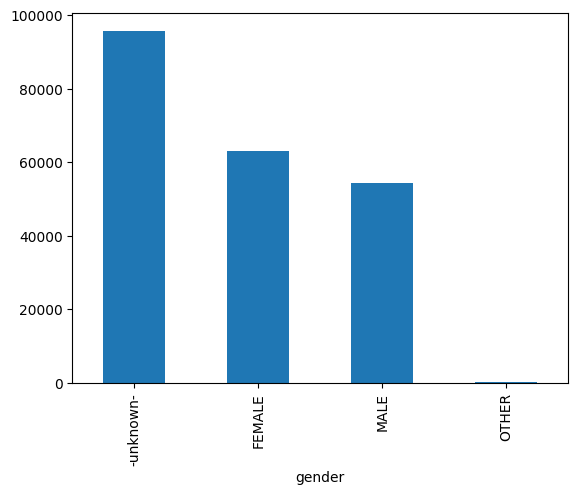

In [9]:
#Se grafican los valores unicos en la columna de genero, pues podria ser un buen indicador:
df['gender'].value_counts().plot.bar()

Puedo ver que la gran mayoria de los datos en la columna de Genero estan clasificados como 'Desconocidos', voy a tomar la decision de asignarlos como valores NaN y respetar la columna 'Other' como personas no-binarias.

<Axes: xlabel='gender'>

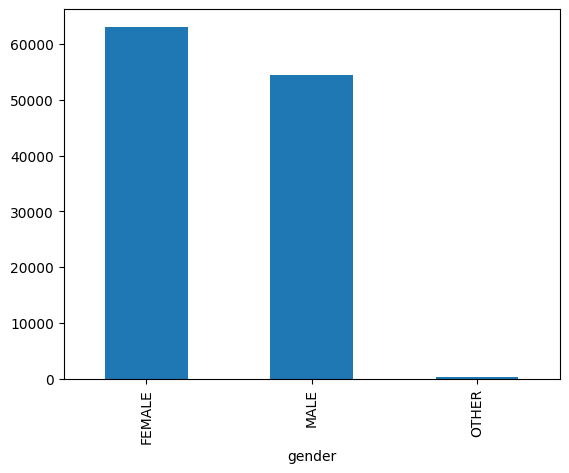

In [10]:
gender = df['gender'].replace("-unknown-", np.NaN)
gender.value_counts().plot.bar()

Observo que la grafica ha perdido bastantes valores, con codigo puedo determinar el porcentaje de datos perdidos con la operacion en la celda previa:



In [11]:
#Hago la cuenta de valores NaN
gender_loss = gender.isna().sum()
#Hago mi calculo e imprimo los resultados
print("\n El numero de datos perdidos en la columna ['gender'] es de:", gender_loss)
print("\n Porcentaje de datos perdidos:", gender_loss*100/len(gender))
#Muestro como ha quedado la columna post procesado
gender.value_counts().head()
gender.describe()


 El numero de datos perdidos en la columna ['gender'] es de: 95688

 Porcentaje de datos perdidos: 44.82902399145471


count     117763
unique         3
top       FEMALE
freq       63041
Name: gender, dtype: object

### Variable Fecha de Primera Reserva
Segun el autor del Dataset, la columna ['date_first_booking'] hace referencia a la fecha de la primera reservacion, voy a observar esta columna. Una descripcion breve podria ayudar:


In [12]:
df['date_first_booking'].describe

<bound method NDFrame.describe of 0                NaN
1                NaN
2         2010-08-02
3         2012-09-08
4         2010-02-18
             ...    
213446           NaN
213447           NaN
213448           NaN
213449           NaN
213450           NaN
Name: date_first_booking, Length: 213451, dtype: object>

Observo que al final del conjunto existen muchos datos NaN, procedere a contarlos y analizar cuantos datos me faltan (o se han perdido en alguna parte del proceso):

In [13]:
#Hago la cuenta de valores NaN
date_loss = df['date_first_booking'].isna().sum()
#Hago mi calculo e imprimo los resultados
print("\n El numero de datos perdidos en la columna ['date_first_booking'] es de:", date_loss)
print("\n Porcentaje de datos perdidos:", date_loss*100/len(df['date_first_booking']))
#Muestro como ha quedado la columna post procesado
df['date_first_booking'].value_counts().head(10)
df['date_first_booking'].value_counts().tail(10)
df['date_first_booking'].describe()


 El numero de datos perdidos en la columna ['date_first_booking'] es de: 124543

 Porcentaje de datos perdidos: 58.347349040294965


count          88908
unique          1976
top       2014-05-22
freq             248
Name: date_first_booking, dtype: object

La descripcion de esta columna es interesante, pues muestra que el 58% de las instancias NO tienen registro de primera fecha de reserva. Esto puede indicar que mas de la mitad de los usuarios reguistrados no realizaron una reserva durante el periodo de tiempo que se registra en el dataset, pero tambien puede significar otra cosa, pues no existe registro de una fecha de segunda reserva o algun indicador de reservas posteriores.

Tambien revela que la fecha del 22 de mayo de 2014 fue muy popular, pues ese dia ser registran 248 primeras reservas. Este indicador podria ser causado por alguna campanya de marketing o descuento en precios.

Es necesario usar una serie de tiempo para graficar el conteo de las fechas de reservacion.

## 1. Eleccion de Features para Analisis de Machine Learning

En este proyecto voy a elegir las siguientes variables para entrenar el dataset y poder predecir el pais de destino, tomare las siguientes variables:

1. Genero: Variable categorica
2. Edad: Variable numerica
3. Lenguaje: Variable categorica
4. Proveedor afiliado: Variable categorica
5. Primer afiliado: Variable categorica
6. Canal de afiliacion: Variable categorica
7. Aplicacion de registro: Variable categorica
8. Primer explorador: Variable categorica
9. Primer fecha de actividad: Variable numerica
10. Fecha de creacion de cuenta: Variable numerica

#### Nota: Antes de procesar las Features que elegi

Empiricamente me percate que es mas conveniente trabajar TODOS los datos que tengo antes de hacerles cualquier modificacion o normalizacion.
Esto sucede por que al momento de entrenar y testear el modelo de Machine Learning, la libreria SciKitLearn necesita que tanto el conjunto de entrenamiento como el de testeo este homegeneizado.

Por esto yo he optado por unir toda mi informacion y volver a Splittearla yo mismo.

In [14]:
train = pd.read_csv('train_users_2.csv')
test = pd.read_csv('test_users.csv')

# Mido cual es la diferencia entre el dataset de Testeo vs Entrenamiento
print(np.setdiff1d(train.columns, test.columns, assume_unique=True))

['country_destination']


In [32]:
# Mi Dataframe 'all_data' es una concatenacion simple de todas las columnas de el set de entrenamiento con el set de prueba. Para que me coincidan, tengo que omitir la columna 'country_destination', que es mi variable objetivo
all_data = pd.concat([train.drop('country_destination', axis=1), test])

In [15]:
# Me interesa observar el estado final de mis variables, procedo a imprimir los Data Types
all_data.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
dtype: object

In [16]:
# Sigo monitoreando el estado de mi vector
all_data.describe()

,timestamp_first_active,age,signup_flow
count,2.755470e+05,158681.000000,275547.000000
mean,2.013310e+13,47.145310,4.291965
std,9.146438e+09,142.629468,8.794313
min,2.009032e+13,1.000000,0.000000
25%,2.013040e+13,28.000000,0.000000
50%,2.014010e+13,33.000000,0.000000
75%,2.014062e+13,42.000000,1.000000
max,2.014093e+13,2014.000000,25.000000


## 2. Tratamiento de Datos Incompletos

Cada columna tiene un tipo de dato y funcionalidad diferente, por esto mi procesamiento consta de dos etapas:

    1. Tratamiento de variables categoricas
    2. Tratamiento de variables numericas

Empezare atacando la columna de Edad, pues desde el EDA ha sido problematica.

In [17]:
# Procedo a limpiar el Dataframe ALL DATA, conformado por los dos conjuntos Train y Test
all_data.replace(to_replace='-unknown-', value=np.nan, inplace=True)
#all_data.replace(to_replace='Other/Unknown', value=np.nan, inplace=True)
all_data.loc[all_data.age > 110, 'age'] = np.nan
all_data.loc[all_data.age < 18, 'age'] = np.nan
print('\nMissing Values as a percentage in training dataset')
print(all_data.iloc[:len(train)].isnull().sum().where(lambda x : x>0).dropna()/len(train))
print('\nMissing Values as a percentage in testing dataset')
print(all_data.iloc[len(train):].isnull().sum().where(lambda x : x>0).dropna()/len(test))


Missing Values as a percentage in training dataset
date_first_booking         0.583473
gender                     0.448290
age                        0.416719
first_affiliate_tracked    0.028414
first_browser              0.127739
dtype: float64

Missing Values as a percentage in testing dataset
date_first_booking         1.000000
gender                     0.544190
age                        0.466294
language                   0.000016
first_affiliate_tracked    0.000322
first_browser              0.275831
dtype: float64


### Features Categoricas para One Hot Encoding

Voy a considerar todas las features categoricas para procesar con OHE:

 1. Genero: Variable categorica

 2. Lenguaje: Variable categorica
 
 3. Proveedor afiliado: Variable categorica

 4. Primer afiliado: Variable categorica

 5. Canal de afiliacion: Variable categorica

 6. Aplicacion de registro: Variable categorica
 
 7. Primer explorador: Variable categorica

In [18]:
#En un diccionario voy a agregar mis variables candidatas a un OHE
ohe_var = ['gender', 'language', 'affiliate_provider', 'first_affiliate_tracked', 'affiliate_channel', 'signup_app', 'first_device_type','first_browser']
#Utilizo el metodo get_dummies() de Pandas para realizar el encoding y muestro el encabezado en pantalla
ohe_df  = pd.get_dummies(df[ohe_var])
ohe_df.head()

,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,language_ca,language_cs,language_da,language_de,language_el,language_en,...,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### Features Numericas para procesamiento:

Ahora voy a enlistar y procesar features numericas:

    1. date_accoubnt_created
    2. date_first_booking
    3. timestamp_first_active

Todas mis variables numericas son del tipo fecha. Para poder procesarlas de una manera adecuada tengo que establecer y normalizar el formato en todas. Esto lo lograre con la libreria 'datetime' de python.

El formato que me gusta es: 
> [ Anyo-mes-dia   hora:minuto:segundo ]


In [19]:
# Para procesar los datos numericos (en este proyecto en particular unicamente son fechas) es mejor normalizar un formato, usare el metodo to_datetime para normalizarlos
df.date_account_created = pd.to_datetime(df.date_account_created)
df.date_first_booking = pd.to_datetime(df.date_first_booking)
df.timestamp_first_active = pd.to_datetime(df.timestamp_first_active, format='%Y%m%d%H%M%S')
df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


Posterior a darles formato a mis fechas, voy guardarlas en un diccionario llamado 'num_var', que hace referencia a mis variables numericas:

In [20]:
#Ahora puedo definir todas mis features numericas en un diccionario 
num_var = [df.timestamp_first_active.dt.year.rename('first_active_year'), df.timestamp_first_active.dt.month.rename('first_active_month'), df.date_account_created.dt.year.rename('account_creation_year'), df.date_account_created.dt.month.rename('account_creation_month'), df.age]
print(num_var)

[0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
213446    2014
213447    2014
213448    2014
213449    2014
213450    2014
Name: first_active_year, Length: 213451, dtype: int32, 0          3
1          5
2          6
3         10
4         12
          ..
213446     6
213447     6
213448     6
213449     6
213450     6
Name: first_active_month, Length: 213451, dtype: int32, 0         2010
1         2011
2         2010
3         2011
4         2010
          ... 
213446    2014
213447    2014
213448    2014
213449    2014
213450    2014
Name: account_creation_year, Length: 213451, dtype: int32, 0          6
1          5
2          9
3         12
4          9
          ..
213446     6
213447     6
213448     6
213449     6
213450     6
Name: account_creation_month, Length: 213451, dtype: int32, 0          NaN
1         38.0
2         56.0
3         42.0
4         41.0
          ... 
213446    32.0
213447     NaN
213448    32.0
213449     NaN
213

Necesito concatenar todas mis variables numericas en un Dataframe con la finalidad de obtener un vector de 1-Dimension, pues es lo que me van a pedir todos los modelos que se emplean en este proyecto.

In [21]:
num_df = pd.concat(num_var, axis=1)
# changing month to cyclical feature
num_df['firth_active_month_sin'] = np.sin((num_df.first_active_month-1)*(2.*np.pi/12))
num_df['firth_active_month_cos'] = np.cos((num_df.first_active_month-1)*(2.*np.pi/12))
num_df['account_creation_month_sin'] = np.sin((num_df.account_creation_month-1)*(2.*np.pi/12))
num_df['account_creation_month_cos'] = np.cos((num_df.account_creation_month-1)*(2.*np.pi/12))
num_df.drop(['first_active_month', 'account_creation_month'], axis=1, inplace=True)
#Normalizar
num_df=(num_df-num_df.min())/(num_df.max()-num_df.min()) 
num_df.head()

,first_active_year,account_creation_year,age,firth_active_month_sin,firth_active_month_cos,account_creation_month_sin,account_creation_month_cos
0,0.0,0.00,NaN,0.933013,0.750000,0.750000,0.066987
1,0.0,0.25,0.217391,0.933013,0.250000,0.933013,0.250000
2,0.0,0.00,0.413043,0.750000,0.066987,0.066987,0.250000
3,0.0,0.25,0.260870,0.000000,0.500000,0.250000,0.933013
4,0.0,0.00,0.250000,0.250000,0.933013,0.066987,0.250000


### Preparacion de Features

Finalmente, puedo concatenar todas mis variables [numericas,categoricas] en un vector uni-dimensional para alimentarlo a mis algoritmos de eleccion:

In [22]:
# Union de todas mis variables en un vector, asi lo puedo alimentar a los algoritmos
df = pd.concat([num_df, ohe_df], axis=1)
df.head()

# Tengo que hacer un Encoding al Target Feature de mi estudio
le = LabelEncoder()
train_labels = le.fit_transform(train.country_destination)
target_labels = pd.Series(train_labels, name='target')
list(le.classes_)

target_labels # Opcional, mostrar las etiquetas de la variable objetivo del proyecto

0          7
1          7
2         10
3         11
4         10
          ..
213446     7
213447     7
213448     7
213449     7
213450     7
Name: target, Length: 213451, dtype: int32

## 3. Eleccion de Algoritmos para Machine Learning

En este proyecto voy a entrenar y medir el algoritmo empleando diferentes metodos y con base en la precision y mis metricas voy a elegir el que sea adapta mas.

Para empezar a elegir, tengo que conocer el problema. Como se menciona en la descripcion del Dataset, el autor lo subio a Kaggle con la finalidad de predecir el Pais Destino que los usuarios van a elegir. Esto indica mi variable objetivo, por lo cual el problema de este proyecto se vuelve necesariamente de Aprendizaje Supervisado.

### Aprendizaje Supervisado

Conozco mi variable objetivo que viene siendo 'Pais Destino' o bien, la columna ['country_destination'].

Los algoritmos con los que he decido probar para obtener resultados son los mas populares para este tipo de problemas:

    1. XGBoost (debido a que este algoritmo ha probado ser efectivo para este tipo de problemas)
    2. RandomForest (para generar diferentes ramificaciones de mi problema e intentar un poco de todo)
    3. K-Nearest Neighbors (para mi tiene sentido crear 'n' clusteres de informacion e intentar clasificarlos)

In [23]:
# Intento XGBoost
x = df # Features
y = target_labels # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Set eval_metric to 'mlogloss' for multi-class
model.fit(x, y)


c:\Users\Administrator\miniconda3\envs\gonzenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:47:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [24]:
XGB_y_pred = model.predict(x_test)

In [25]:
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, XGB_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.00      0.00      0.00       286
           2       1.00      0.02      0.04       212
           3       1.00      0.00      0.00       450
           4       0.80      0.00      0.01      1005
           5       0.00      0.00      0.00       465
           6       1.00      0.00      0.00       567
           7       0.66      0.87      0.75     24909
           8       1.00      0.01      0.03       152
           9       0.00      0.00      0.00        43
          10       0.50      0.39      0.44     12475
          11       1.00      0.00      0.01      2019

    accuracy                           0.62     42691
   macro avg       0.58      0.11      0.11     42691
weighted avg       0.63      0.62      0.57     42691



c:\Users\Administrator\miniconda3\envs\gonzenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\miniconda3\envs\gonzenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\miniconda3\envs\gonzenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [26]:
# Random Forest

rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, x, y, cv=5)  # 5-fold cross-validation
print("Random Forest CV Scores:", rf_scores)
print("Mean CV Score:", rf_scores.mean())

Random Forest CV Scores: [0.18043616 0.22126962 0.1450691  0.37003982 0.58559382]
Mean CV Score: 0.30048170327403373


In [27]:
rf_model.fit(x_train, y_train, sample_weight=None)
RF_y_pred = rf_model.predict(x_test)

In [28]:
print(confusion_matrix(y_test, RF_y_pred))
print(classification_report(y_test, RF_y_pred))

[[    0     0     1     0     4     1     1    56     0     0    39     6]
 [    2     0     0     2     3     2     3   157     1     1   108     7]
 [    1     1     1     1     4     1     0   120     1     0    74     8]
 [    1     2     1     2     6     0     6   246     0     0   175    11]
 [    4     4     0    10    21     6     8   566     0     0   354    32]
 [    1     0     3     8    11     2     2   268     0     0   156    14]
 [    1     3     2     5     9     5     5   348     0     0   181     8]
 [   24    42    35    93   187    98   116 19380    24     6  4501   403]
 [    0     0     0     1     2     2     1    83     0     0    60     3]
 [    1     0     0     0     2     0     0    23     0     0    14     3]
 [   26    63    36   102   203    68    89  6961    19     5  4505   398]
 [    2     5     5    16    26    15    16  1192     8     3   658    73]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00 

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k)
knn_model.fit(x_train.fillna(0), y_train.fillna(0))

KNeighborsClassifier()

In [30]:
KNN_y_pred = knn_model.predict(x_test.fillna(0))

In [31]:
print(confusion_matrix(y_test, KNN_y_pred))
print(classification_report(y_test, KNN_y_pred))


[[    0     0     0     0     4     0     1    56     0     0    46     1]
 [    0     0     0     0     2     1     1   180     0     0   100     2]
 [    1     0     2     3     0     1     0   134     0     0    69     2]
 [    0     0     0     3     5     1     2   281     0     0   154     4]
 [    2     1     1     3    13     2     3   667     0     0   305     8]
 [    0     0     1     1     6     0     2   320     0     0   132     3]
 [    0     1     0     3     8     0     3   387     0     0   163     2]
 [    8    24    22    48   119    27    23 20314     1     1  4192   130]
 [    0     0     0     1     0     1     1    98     0     0    50     1]
 [    0     0     0     0     2     0     0    28     0     0    13     0]
 [   10    25    29    40   109    23    31  8090     0     1  4023    94]
 [    1     2     4     5    16     4     5  1345     0     0   627    10]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00 

## 4. Metricas

He probado al menos tres algoritmos que son populares para la solucion de problemas similares al que tengo en este proyecto. 
La seccion de Metricas estara dedicada a establecer criterios para que yo pueda elegir el mejor de los algoritmos para reportar un modelo de Machine Learning.

Con la experiencia obtenida en el curso de Data Science I, puedo decir que las metricas que me van a ayudar adecidir un modelo seran:
    1. Precision del Algoritmo al hacer prediccion con el modelo de Prueba (Accuracy)
    2. R-cuadrada del Algoritmo
    3. MSE o Error Cuadrado Promedio 
    4. MAE o Error Absoluto Promedio

Procedo a realizar los calculos para cada una de mis predicciones:

    i. XGBoost
    ii. Random Forest
    iii. K-nearest neighbor

In [43]:
# i . Metricas para XGBoost

mae_xgb = mean_absolute_error(y_test, XGB_y_pred)
mse_xgb = mean_squared_error(y_test, XGB_y_pred)
r2_xgb = r2_score(y_test, XGB_y_pred)
xgb_accuracy = accuracy_score(y_test, XGB_y_pred)

print("Accuracy: ", xgb_accuracy)
print("MAE: " , mae_xgb)
print("MSE: ", mse_xgb)
print("R2-score: ", r2_xgb)

Accuracy:  0.6233163898714015
MAE:  1.208779368016678
MSE:  4.41160900423977
R2-score:  -0.22072456357910375


In [44]:
# ii . Metricas para Random Forest

mae_rf = mean_absolute_error(y_test, RF_y_pred)
mse_rf = mean_squared_error(y_test, RF_y_pred)
r2_rf = r2_score(y_test, RF_y_pred)
rf_accuracy = accuracy_score(y_test, RF_y_pred)

print("Accuracy: ", rf_accuracy)
print("MAE: " , mae_rf)
print("MSE: ", mse_rf)
print("R2-score: ", r2_rf)

Accuracy:  0.5619217165210466
MAE:  1.4449181326274858
MSE:  5.647302710173104
R2-score:  -0.5626500738505784


In [45]:
# iii . Metricas para KNN

mae_knn = mean_absolute_error(y_test, KNN_y_pred)
mse_knn = mean_squared_error(y_test, KNN_y_pred)
r2_knn = r2_score(y_test, KNN_y_pred)
knn_accuracy = accuracy_score(y_test, KNN_y_pred)

print("Accuracy: ", knn_accuracy)
print("MAE: " , mae_knn)
print("MSE: ", mse_knn)
print("R2-score: ", r2_knn)

Accuracy:  0.5707994659295871
MAE:  1.3916516361762432
MSE:  5.175868450024596
R2-score:  -0.43220075685014825


## 5. Conclusiones

Despues de leer las metricas de los tres algoritmos disponibles puedo ver que, a pesar de tener una Precision que no es pesima, los resultados de los Errores absolutos y el R2-score no son para nada los ideales.
Sin embargo, el algoritmo XGBoost termina siendo el mejor de los tres algotimos que he seleccionado.

Si el dia de hoy yo tuviera que subir mi entrega para el reto de Kaggle, seria un dataframe construido con el modelo de Machine Learning que emplea

    ### XGBoost
    i. Este algoritmo ha demostrado tener un R2 negativo, pero de cualquier manera es menor que los otros dos
    ii. Tiene los menores Errores Promedios
    iii. Tiene la mayor precision de los 3 algoritmos

El algoritmo que seleccione todavia no esta ni cerca de ser algo que se emplea para la produccion en alguna empresa. Con base en esta premisa puedo decir que:

### Este conjunto de datos ha resultado muy complicado de balancear y procesar. Para mi caso en particular, yo necesito mas tiempo y experiencia con limpieza de datos para generar modelos con mejor precision Y mejores metricas, ya sean R2, MSE, MAE o hasta F1-Scores. Sin embargo, se logra procesar y hacer predicciones con 62% de precision usando XGBoost en un conjunto de datos disenyado para ser retador.

Gracias por la atencion!


